In [1]:
#import important library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data test and train 
test_data = pd.read_csv('loan_test.csv')
train_data= pd.read_csv('loan_train.csv')

In [3]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Exploratory data analysis (EDA)

In [5]:
train_data.shape # find how many features and samples we have in training data

(614, 13)

In [6]:
test_data.shape # find how many features and samples we have in testing data

(367, 12)

In [7]:
train_data.describe() # summary of numarical values train data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
test_data.describe() # summary of numarical values test data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [9]:
train_data.columns # to show colunms

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [11]:
train_data.info() #check data type of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
test_data.info() #check data type of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [13]:
train_data.isnull().sum() #check for the null values in train data

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
test_data.isnull().sum() #check for null values in test data

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [15]:
plt.style.use('ggplot')

<AxesSubplot:>

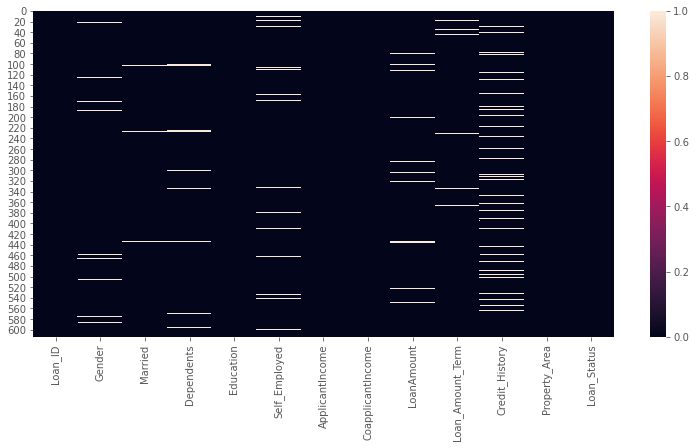

In [16]:
#visualization of null values in train data
plt.subplots(figsize = (13,6))
sns.heatmap(train_data.isnull())

<AxesSubplot:>

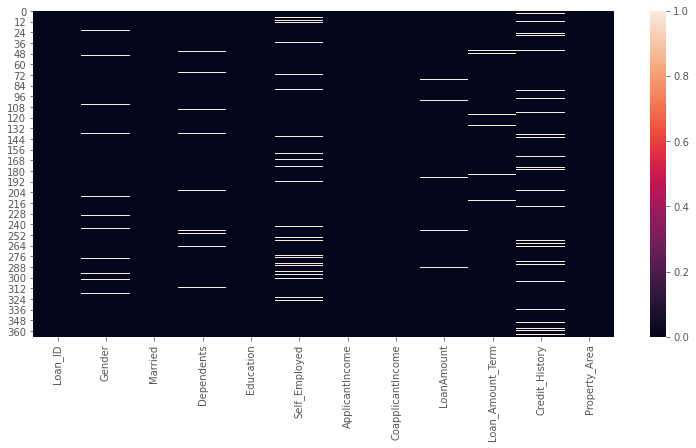

In [17]:
#visualization of null values in train data
plt.subplots(figsize = (13,6))
sns.heatmap(test_data.isnull())

In [18]:
# fill null values of train data
train_data['Gender'].fillna(method='ffill',inplace=True)
train_data['Married'].fillna(method='ffill',inplace=True)
train_data['Dependents'] = train_data['Dependents'].fillna(train_data['Dependents'].mode())
train_data['Self_Employed'].fillna(method='ffill',inplace=True)
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean())
train_data['Loan_Amount_Term'] =train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean())
train_data['Credit_History'].fillna(method='ffill',inplace=True)
train_data['Dependents'].fillna(method='ffill',inplace=True)

In [19]:
train_data.isnull().sum() #check null values 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
# fill null values of test data
test_data['Gender'].fillna(method='ffill',inplace=True)
test_data['Married'].fillna(method='ffill',inplace=True)
test_data['Dependents'] = train_data['Dependents'].fillna(train_data['Dependents'].mode())
test_data['Self_Employed'].fillna(method='ffill',inplace=True)
test_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].mode())
test_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode())
test_data['Credit_History'].fillna(method='ffill',inplace=True)

In [21]:
test_data.isnull().sum() #check null values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Data visualization

### Categorical Data

In [22]:
train_data['Loan_Status'].value_counts() # count of loan status

Y    422
N    192
Name: Loan_Status, dtype: int64

Text(0.5, 0, 'Loan_status')

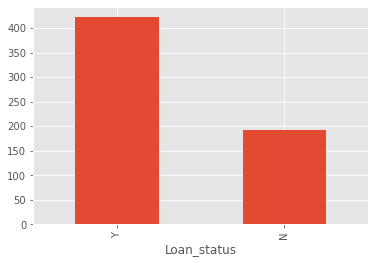

In [23]:
# visualization of laon status
train_data['Loan_Status'].value_counts().plot(kind ='bar')
plt.xlabel('Loan_status')

<AxesSubplot:xlabel='Gender', ylabel='count'>

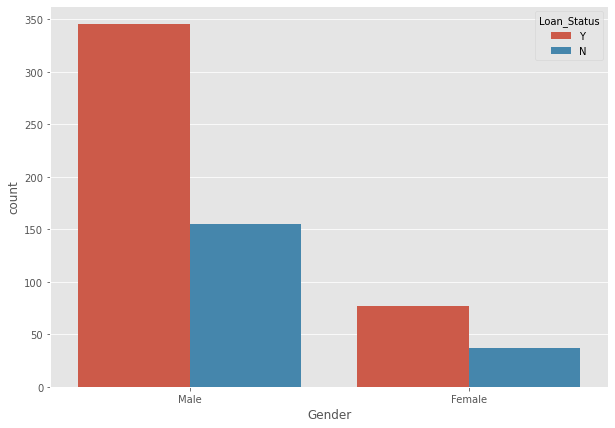

In [24]:
plt.subplots(figsize = (10,7))
sns.countplot(data = train_data,x='Gender',hue='Loan_Status')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

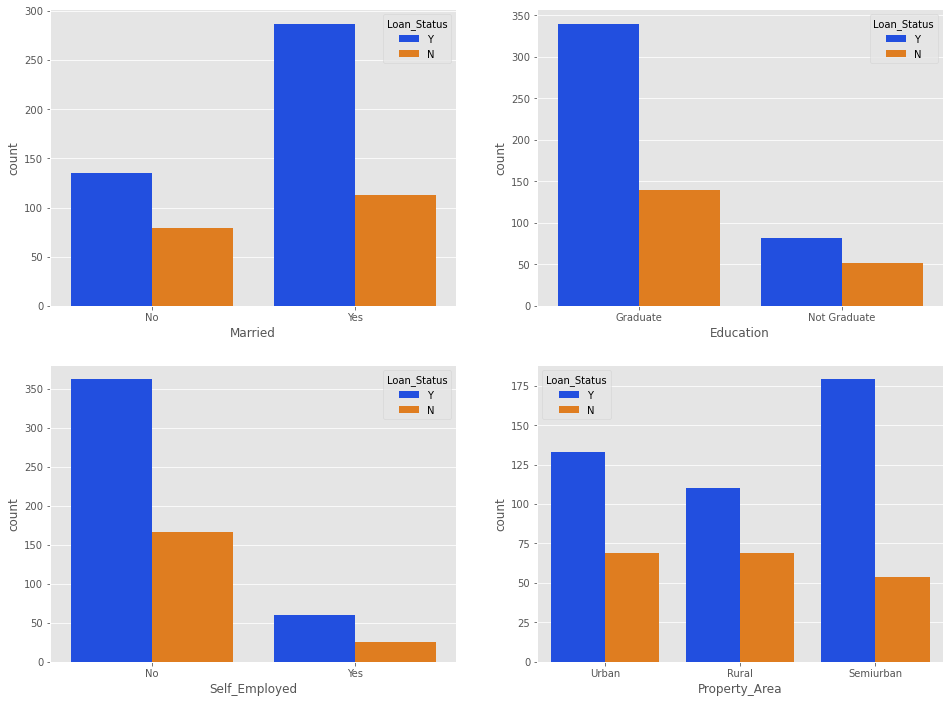

In [25]:
f,ax = plt.subplots(2,2,figsize=(16,12))
#loan_Status by married
sns.countplot(data = train_data,x='Married',hue='Loan_Status',ax =ax[0][0],palette="bright")
#loan_Status by Education
sns.countplot(data= train_data,x='Education',hue='Loan_Status',ax=ax[0][1],palette='bright')
#loan_Status by Self_Employed
sns.countplot(data=train_data,x='Self_Employed',hue='Loan_Status',ax=ax[1][0],palette='bright')
#loan_Status by Property_Area
sns.countplot(data=train_data,x='Property_Area',hue="Loan_Status",ax=ax[1][1],palette = 'bright')

### Numerical Data

<AxesSubplot:xlabel='Dependents', ylabel='count'>

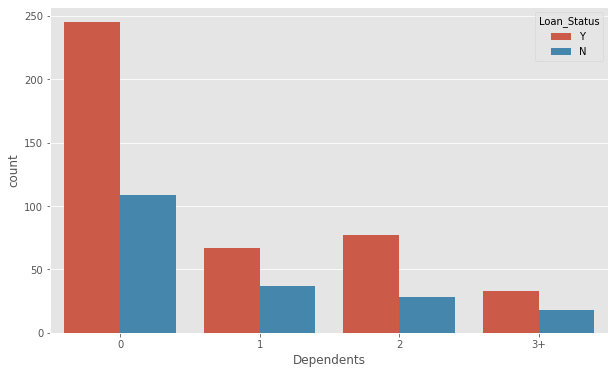

In [26]:
#loan status by Dependents
plt.subplots(figsize = (10,6))
sns.countplot(data = train_data,x = 'Dependents',hue='Loan_Status')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

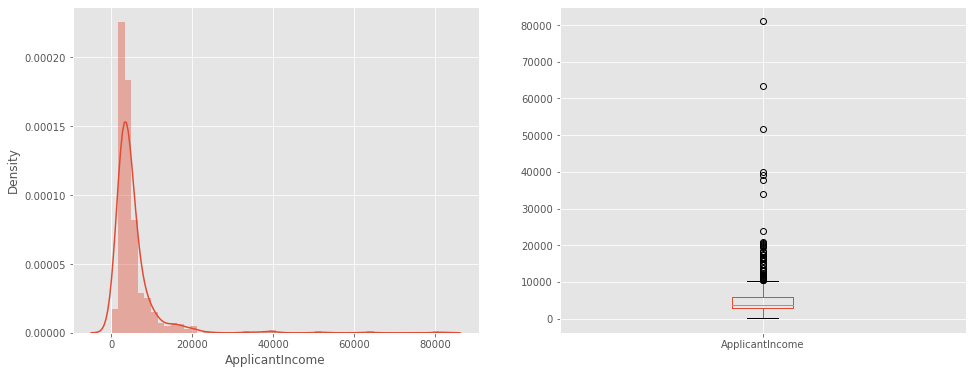

In [27]:
#distribution of income
plt.subplot(121)
sns.distplot(train_data['ApplicantIncome'])

plt.subplot(122)
train_data['ApplicantIncome'].plot.box(figsize=(16,6))

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

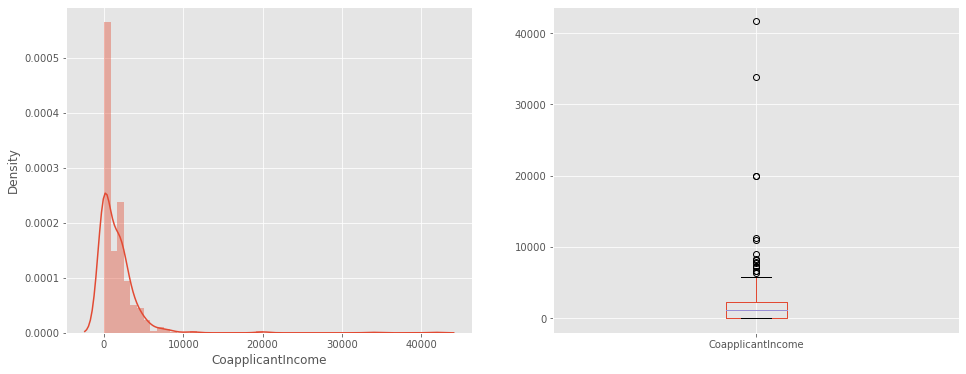

In [28]:
# distribution of coapplicantincome
plt.subplot(121)
sns.distplot(train_data['CoapplicantIncome'])

plt.subplot(122)
train_data['CoapplicantIncome'].plot.box(figsize=(16,6))

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>

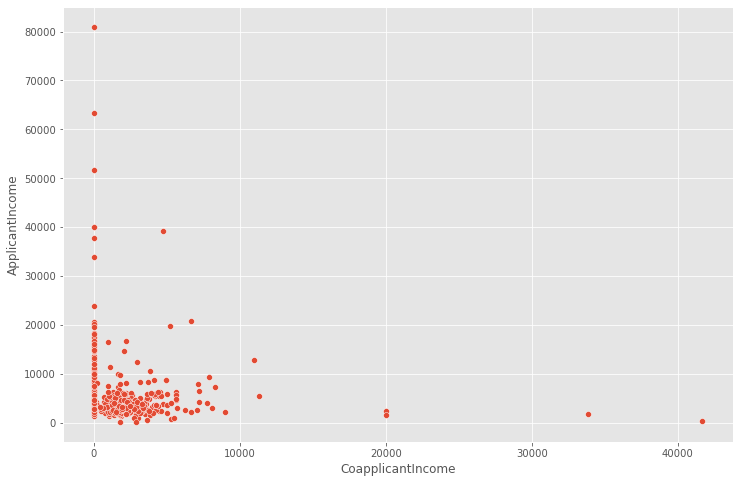

In [29]:
# relation between copplicantincome and applicantincome
plt.subplots(figsize=(12,8))
sns.scatterplot(data = train_data,x='CoapplicantIncome',y='ApplicantIncome')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

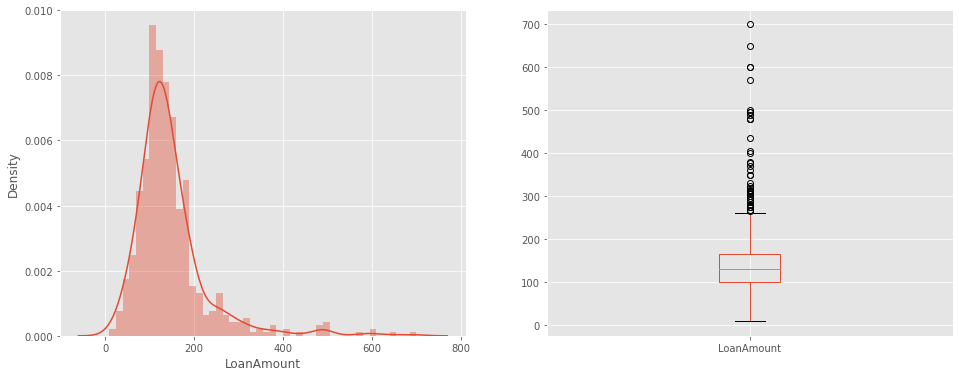

In [30]:
# Distribution of Loan Amount
plt.subplot(121)
sns.distplot(train_data['LoanAmount'])

plt.subplot(122)
train_data['LoanAmount'].plot.box(figsize=(16,6))

In [31]:
# frequency table of a variable will give us the count of each category in that variable
train_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Text(0.5, 1.0, 'Loan_Amount_Term')

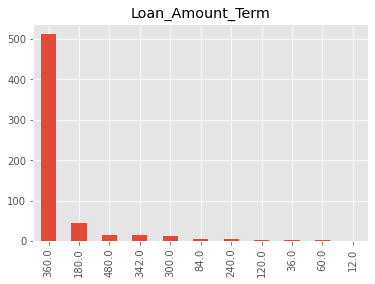

In [32]:
# plot bar chart
train_data['Loan_Amount_Term'].value_counts().plot.bar()
plt.title('Loan_Amount_Term')

Text(0.5, 0.98, '')

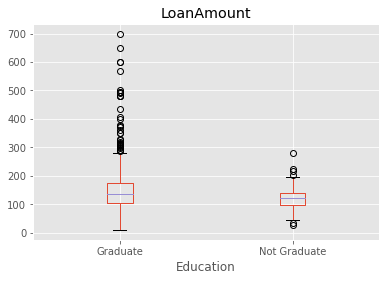

In [33]:
# LoanAmount by Graduate and Not Graduate
train_data.boxplot(column='LoanAmount', by = 'Education')
plt.suptitle("")

Text(0.5, 0.98, '')

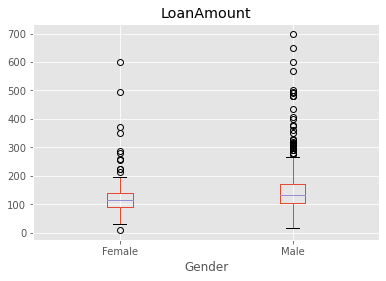

In [34]:
# LoanAmount by Gender
train_data.boxplot(column='LoanAmount', by = 'Gender')
plt.suptitle("")

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

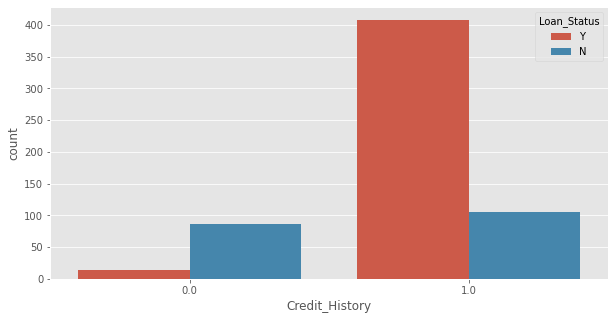

In [35]:
plt.subplots(figsize=(10,5))
sns.countplot(data = train_data,x='Credit_History',hue='Loan_Status')

### Data Preprocessing

In [36]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [37]:
#Drop unnecessary features
train=train_data.drop('Loan_ID',axis = 1)
test=test_data.drop('Loan_ID',axis = 1)

In [38]:
# replacing 3+ in Dependents variable with 3 for both train and test set
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

In [39]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [40]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [41]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,128.000000,360.0,1.0,Urban
2,Male,Yes,0,Graduate,No,5000,1800,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Graduate,No,2340,2546,120.000000,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,141.000000,360.0,1.0,Urban


In [42]:
# calculate correlation matrix
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.020183,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,0.009391,-0.059187
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.018836,-0.036416
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,-0.018442,-0.020974
Credit_History,-0.020183,0.009391,-0.018836,-0.018442,1.000000,0.525152
Loan_Status,-0.004710,-0.059187,-0.036416,-0.020974,0.525152,1.000000


<AxesSubplot:>

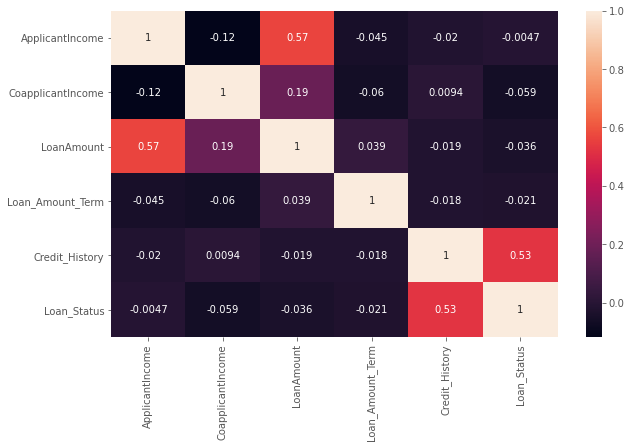

In [43]:
# visualize correlation matrix
plt.subplots(figsize = (10,6))
sns.heatmap(data = train.corr(),annot=True)

In [44]:
# create feature and target matrix
x = train.drop('Loan_Status',axis =1)
y = train['Loan_Status']

In [45]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban


In [46]:
# convert categorical data into numerical using one hot encodeing
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [47]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


In [48]:
# to splite the data 
from sklearn.model_selection import train_test_split

In [49]:
# spliting data useing train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [50]:
# check the shape 
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((491, 20), (123, 20), (491,), (123,))

In [83]:
# import model 
from sklearn.linear_model import LogisticRegression 

In [84]:
# model building
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [85]:
# model prediction
pred =LR.predict(x_test)

In [86]:
# compere true value vs prediction
predction =pd.DataFrame({'prediction':pred,'true value':y_test})
predction

,prediction,true value
65,1,0
467,1,1
522,1,1
252,0,1
530,1,1
...,...,...
517,0,0
194,1,1
232,1,1
398,1,1


In [87]:
# mport libraries
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [88]:
# check  accuracy of model 
accuracy_score(y_test,pred)*100

72.35772357723577

[[12 28]
 [ 6 77]]


Text(33.0, 0.5, 'True')

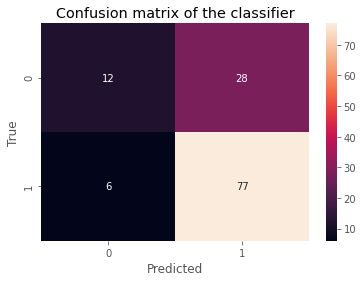

In [68]:
cm = confusion_matrix(y_test,pred)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [58]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.30      0.41        40
           1       0.73      0.93      0.82        83

    accuracy                           0.72       123
   macro avg       0.70      0.61      0.62       123
weighted avg       0.71      0.72      0.69       123



In [59]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(LR,f)

In [60]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [61]:
x=mp.predict(x_test)

In [62]:
accuracy_score(y_test,x)

0.7235772357723578